In [1]:
#importing some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [2]:
#Reading dataset using pandas
test=pd.read_csv(r'C:\Users\HP\Downloads\test_AbJTz2l.csv')
train=pd.read_csv(r'C:\Users\HP\Downloads\train_v9rqX0R.csv')

In [3]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis

In [5]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [6]:
test.shape

(5681, 11)

In [7]:
train.shape

(8523, 12)

In [8]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
train['source'] = 'train'
test['source'] = 'test'
df=pd.concat([train,test], ignore_index=True)

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [12]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [14]:
df.shape

(14204, 13)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


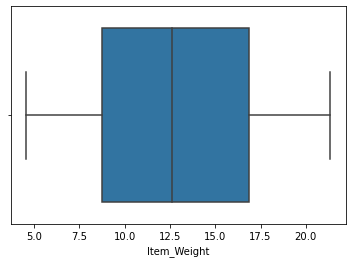

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


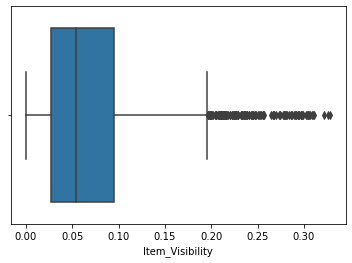

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


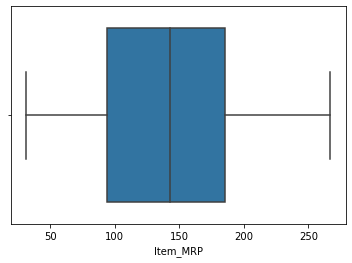

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


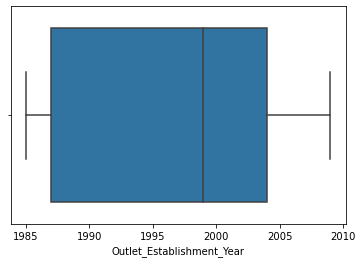

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


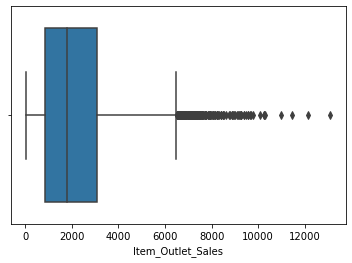

In [15]:

for i in train.describe().columns:
  sns.boxplot(train[i].dropna())
  plt.show()

In [16]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

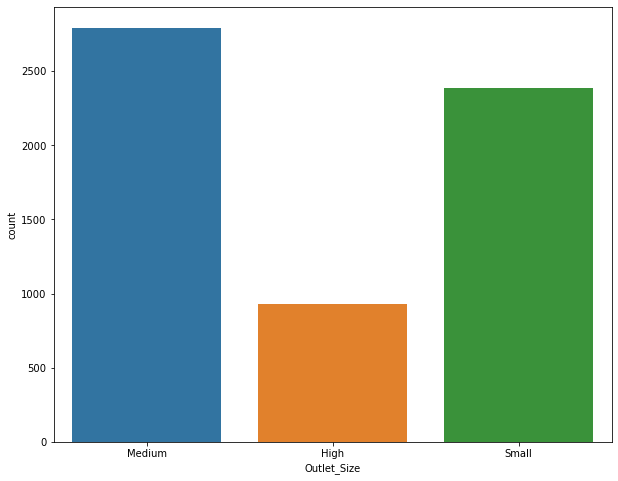

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(train.Outlet_Size)

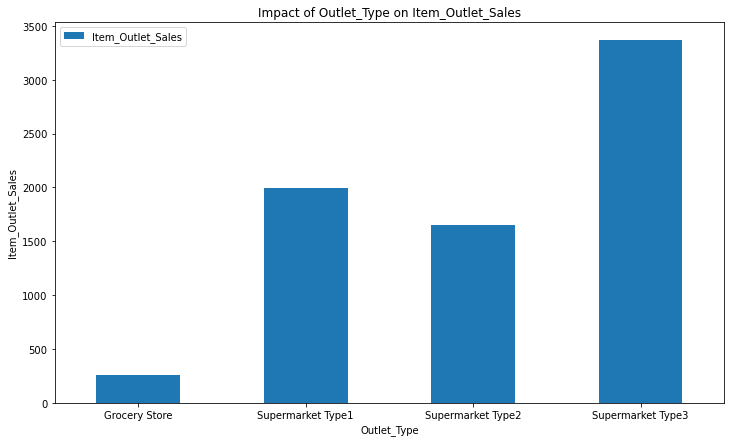

In [18]:
#Impact of Outlet_Type on Item_Outlet_Sales
Item_Type_pivot = \
df.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

# Correlation between different attributes

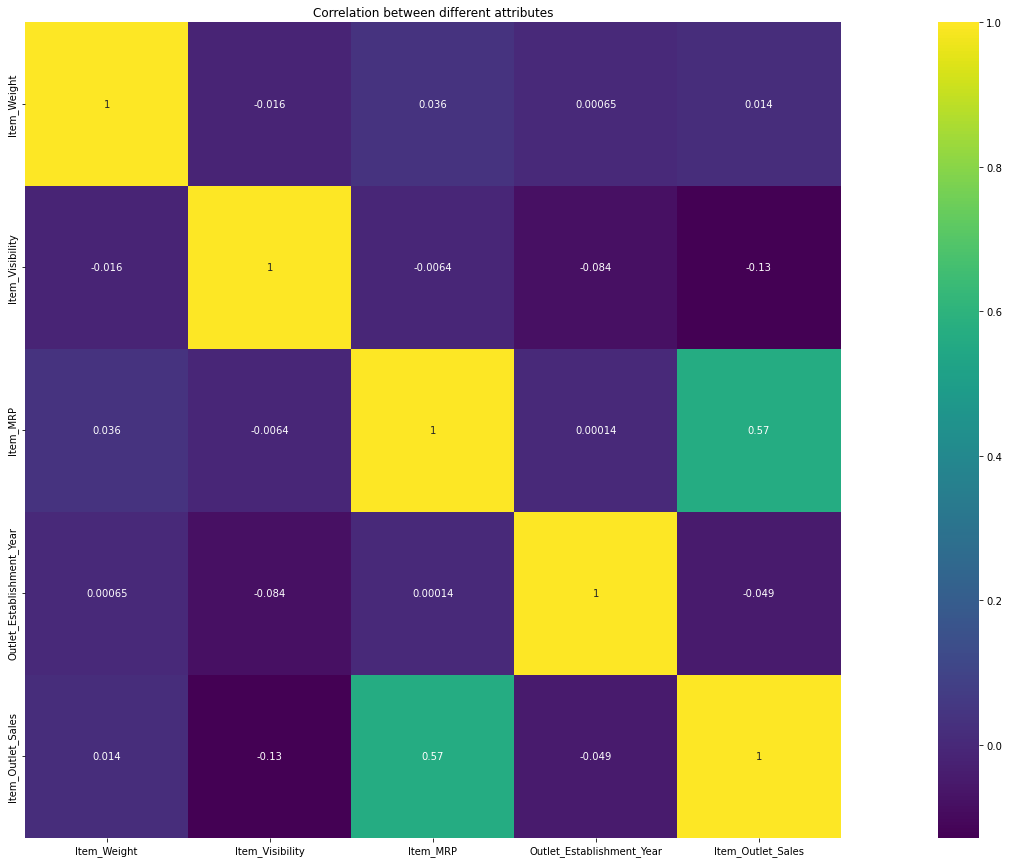

In [19]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),vmax=1, square=True,annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

In [20]:
#no item is highly co related

# Feature Engineering

In [21]:
#Missing Values
#From the boxplot we noticed that the item_weight column is normal  therefore  replace the missing values with the Mean 

In [22]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [23]:
#  Outlet_Size can be replaced with medium which appear frequently
df['Outlet_Size'].fillna('Medium', inplace=True)

In [24]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [25]:
#so missing values are replaced we dont need to change Item_Outlet_Sales because that is needed to be precicted

# Categorical Variable Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#New variable for outlet
df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet']
for i in varib:
  df[i] = label.fit_transform(df[i])

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,3
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,1


In [28]:
#Dummy Variables:

df = pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet'])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Item_Fat_Content_4             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
Outlet_2                       uint8
O

# Model Building

In [29]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1, inplace=True)

In [30]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [31]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.300,0.016047,249.8092,OUT049,3735.1380,train,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,0.019278,48.2692,OUT018,443.4228,train,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0.016760,141.6180,OUT049,2097.2700,train,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,0.000000,182.0950,OUT010,732.3800,train,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0.000000,53.8614,OUT013,994.7052,train,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,2778.3834,train,0,1,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,0.046982,108.1570,OUT045,549.2850,train,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,1193.1136,train,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,1845.5976,train,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [32]:
test

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,FDW58,20.750000,0.007565,107.8622,OUT049,NaN,test,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8524,FDW14,8.300000,0.038428,87.3198,OUT017,NaN,test,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8525,NCN55,14.600000,0.099575,241.7538,OUT010,NaN,test,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8526,FDQ58,7.315000,0.015388,155.0340,OUT017,NaN,test,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8527,FDY38,12.792854,0.118599,234.2300,OUT027,NaN,test,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500000,0.013496,141.3154,OUT046,NaN,test,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.600000,0.142991,169.1448,OUT018,NaN,test,0,0,1,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.000000,0.073529,118.7440,OUT045,NaN,test,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.300000,0.000000,214.6218,OUT017,NaN,test,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [33]:
train.drop(['source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14216\402492518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14216\402492518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)


# Splitting Data Set

In [34]:
X = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y = train['Item_Outlet_Sales']

In [35]:
# 20% data as validation set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Finding Best fit Model(Hyperparameter tuning)

In [36]:
#linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(metrics.r2_score(y_test,pred))

# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(lr,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

0.5807354302160641
Cross Validation Scores are: [0.57103405 0.55554612 0.54747024 0.56651711 0.56614695]

Average of Cross Validation Scores: 0.561342894255972


In [37]:
#KNeighborsRegressor()
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)
print(metrics.r2_score(y_test,pred))

# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(KNN,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

0.42502245873018396
Cross Validation Scores are: [0.48872268 0.4141019  0.40052043 0.45637085 0.48613394]

Average of Cross Validation Scores: 0.449169956526051


In [38]:
#'Decision Tree Regressor'
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)
print(metrics.r2_score(y_test,pred))
# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(dt,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

0.17642110606843942
Cross Validation Scores are: [0.22988487 0.20763175 0.13859085 0.19987997 0.25356108]

Average of Cross Validation Scores: 0.2059097030879578


In [39]:
#RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print(metrics.r2_score(y_test,pred))

# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(rf,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

0.5645458229053435
Cross Validation Scores are: [0.57402408 0.54055595 0.52782371 0.55970597 0.56573965]

Average of Cross Validation Scores: 0.5535698729986611


In [40]:
#sklearn.ensemble.GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print(metrics.r2_score(y_test,pred))

# Use K-Fold Cross Validation to generalise the model accuracy.

from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5)
score=cross_val_score(GBR,X,y,cv=kf)

print("Cross Validation Scores are: {}\n".format(score))

print("Average of Cross Validation Scores: {}".format(score.mean()))

0.6025530694690884
Cross Validation Scores are: [0.60782721 0.58115572 0.57307266 0.6010723  0.60458394]

Average of Cross Validation Scores: 0.5935423668431087


# Grid Search CV for decision Tree

In [42]:
from sklearn.model_selection import  GridSearchCV
params = {'max_depth': [7], 
          'max_features': ['auto', 'sqrt'], 
          'min_samples_leaf': [7],
          'min_samples_split': [0.1], 
          'criterion': ['mse'] 
         }

tree = DecisionTreeRegressor()
rs = GridSearchCV(estimator=tree, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features='auto',
                      min_samples_leaf=7, min_samples_split=0.1)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [43]:
tree = rs.best_estimator_
tree.fit(X_train, y_train)
pred = tree.predict(X_test)

print('-'*30)
r2 = metrics.r2_score(y_test, pred)
print('R2: ', r2)

decision_tree = ('Tree', r2)

------------------------------
R2:  0.6028274660475371


C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


# Grid Search cv for Random forest

In [44]:
params = { 
          'n_estimators': [1000],
          'max_depth': [8],                  #'max_depth': [4,5,6,7,8,9]
          'max_features': ['auto', 'sqrt'],  #'max_features': ['auto', 'sqrt']
          'min_samples_leaf': [4],           #'min_samples_leaf': [2,3,4,5,6,7]
          'min_samples_split' : [0.01],      #'min_samples_split' : [0.01]
         }

rf = RandomForestRegressor()
rs = GridSearchCV(estimator=rf, param_grid=params, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
rs.fit(X_train, y_train)
print(rs.best_estimator_)

RandomForestRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=0.01,
                      n_estimators=1000)


In [45]:
rf.fit(X_train, y_train)
pred = rf.predict(X_test)


In [46]:
print('-'*30)
r2 = metrics.r2_score(y_test, pred)
print('R2: ', r2)

------------------------------
R2:  0.5604096620996988


In [47]:
test1 = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
score=rf.predict(test1)

In [49]:
submit=pd.DataFrame({'Item_Identifier':test['Item_Identifier'],'Outlet_Identifier':test['Outlet_Identifier'],'Item_Outlet_Sales':score})


In [50]:
submit

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,1705.473332
8524,FDW14,OUT017,1232.648804
8525,NCN55,OUT010,553.199904
8526,FDQ58,OUT017,2353.829372
8527,FDY38,OUT027,6824.543212
...,...,...,...
14199,FDB58,OUT046,2002.746374
14200,FDD47,OUT018,2564.881314
14201,NCO17,OUT045,1634.512368
14202,FDJ26,OUT017,4769.518222


In [51]:
submit.set_index('Item_Identifier',inplace=True)

In [52]:
submit.to_csv(r'C:\Users\HP\Downloads\submission123.csv')